core dev



<function matplotlib.pyplot.show(close=None, block=None)>

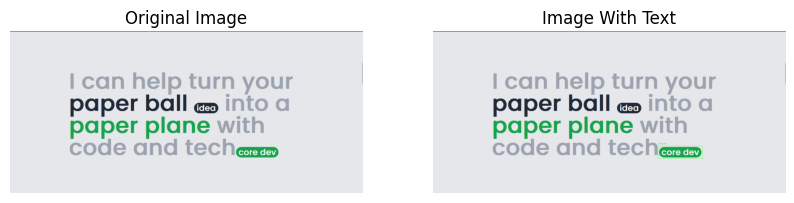

In [2]:
import pytesseract
import cv2
from pytesseract import Output
# Specify the tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Load the image
image = cv2.imread('right.png')
original_image = image.copy() # Make a copy for displaying the original later
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Use Opencv to find text blocks (simple thresholding)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
# Dilate to connect text characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations = 3)
# Find Contours
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
# Sort Contours by their y-coordinate first, then x-coordinate
lines = sorted(contours, key=lambda ctr: (cv2.boundingRect(ctr)[1],cv2.boundingRect(ctr)[0]))
# Go through each contour, crop and read the text
for contour in lines:
    x,y,w,h = cv2.boundingRect(contour)
# Make sure the contour area is a reasonable size
if w*h > 50:
    roi = image[y:y+h, x:x+w]
text = pytesseract.image_to_string(roi, lang='eng', config= '--psm 6')
cv2.putText(image, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1)
cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 1)
print(text)
import matplotlib.pyplot as plt
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the original image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
# Display the image with detected text
plt.subplot(1,2,2)
plt.imshow(image_rgb)
plt.title('Image With Text')
plt.axis('off')
plt.show